In [11]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
sns.get_dataset_names()

/usr/lib/python3.6/site-packages/seaborn/utils.py:358: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 358 of the file /usr/lib/python3.6/site-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [8]:
df = sns.load_dataset('diamonds')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [10]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [14]:
df.groupby('cut').carat.describe()

,count,mean,std,min,25%,50%,75%,max
cut,,,,,,,,
Fair,1610.0,1.046137,0.516404,0.22,0.70,1.00,1.20,5.01
Good,4906.0,0.849185,0.454054,0.23,0.50,0.82,1.01,3.01
Ideal,21551.0,0.702837,0.432876,0.20,0.35,0.54,1.01,3.50
Premium,13791.0,0.891955,0.515262,0.20,0.41,0.86,1.20,4.01
Very Good,12082.0,0.806381,0.459435,0.20,0.41,0.71,1.02,4.00


In [15]:
df.groupby('cut').price.describe()

,count,mean,std,min,25%,50%,75%,max
cut,,,,,,,,
Fair,1610.0,4358.757764,3560.386612,337.0,2050.25,3282.0,5205.50,18574.0
Good,4906.0,3928.864452,3681.589584,327.0,1145.00,3050.5,5028.00,18788.0
Ideal,21551.0,3457.541970,3808.401172,326.0,878.00,1810.0,4678.50,18806.0
Premium,13791.0,4584.257704,4349.204961,326.0,1046.00,3185.0,6296.00,18823.0
Very Good,12082.0,3981.759891,3935.862161,336.0,912.00,2648.0,5372.75,18818.0


In [17]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


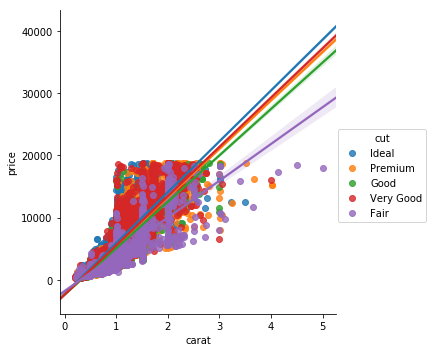

In [19]:
sns.lmplot('carat', 'price', hue = 'cut', data = df)
plt.show()

In [31]:
df2 = df.query('cut != "Fair"')
df2['price']= np.log10(df2.price)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


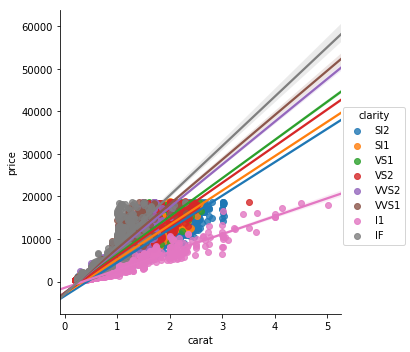

In [32]:
sns.lmplot('carat', 'price', hue = 'clarity', data = df)
plt.show()

In [35]:
df.color.drop_duplicates()

0     E
3     I
4     J
7     H
12    F
25    G
28    D
Name: color, dtype: object

In [36]:
from pandas.api.types import CategoricalDtype

In [37]:
color_type = CategoricalDtype(categories=['J','I','H','G','F','E','D'], ordered=True)

In [39]:
df.color = df.color.astype(color_type)

In [42]:
cut_type = CategoricalDtype(categories=list(reversed(['Ideal','Premium','Very Good','Good','Fair'])))
df.cut = df.cut.astype(cut_type)

In [44]:
clarity_type = CategoricalDtype(categories=['I1','SI2','SI1','VS2','VS1','WS2','WS1','IF'])
df.clarity = df.clarity.astype(clarity_type)

In [55]:
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.model_selection import train_test_split

In [56]:
reg = GradientBoostingRegressor()
X = df.loc[:,df.columns != 'price']
y = df.price

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


ValueError: could not convert string to float: 'SI1'